In [4]:
import pandas as pd
import sqlite3

In [5]:
con = sqlite3.connect(f"file:../data/db/soccer.db?mode=rw", uri=True) 
# 获取cursor对象 
cur = con.cursor() 

Arsenal


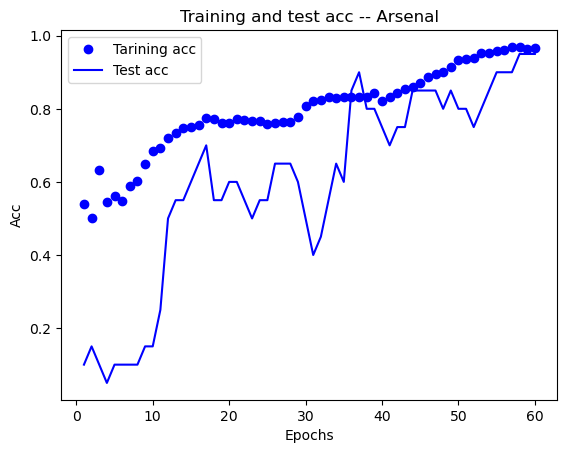

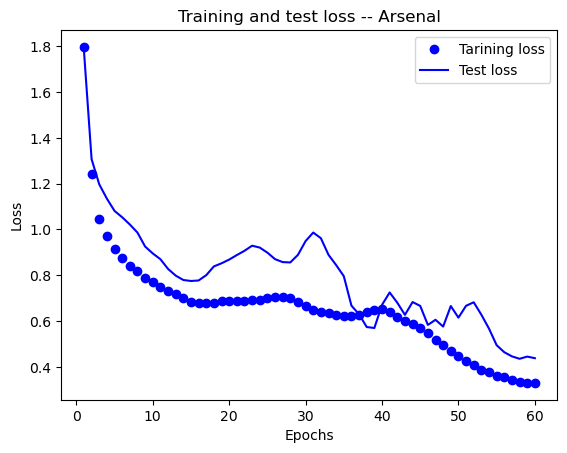

Aston Villa


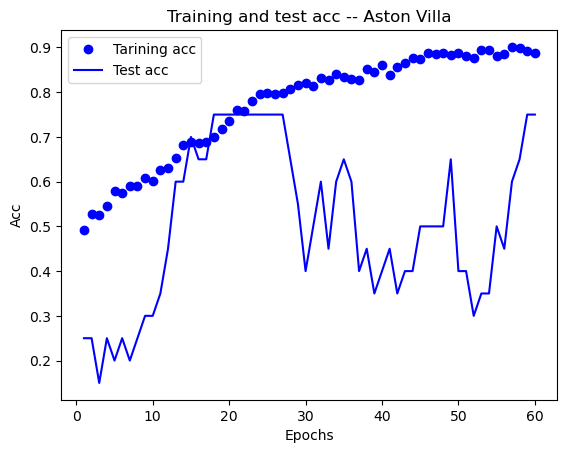

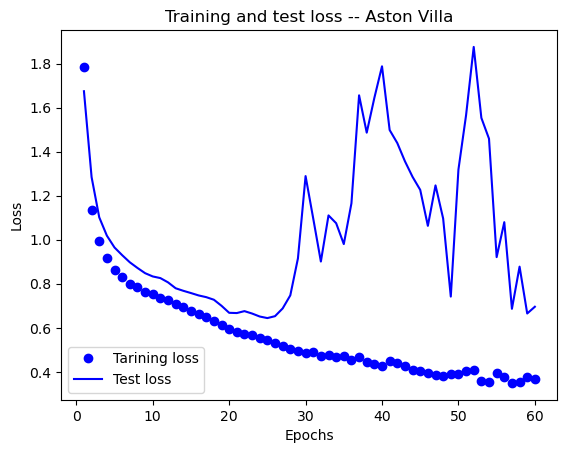

Chelsea


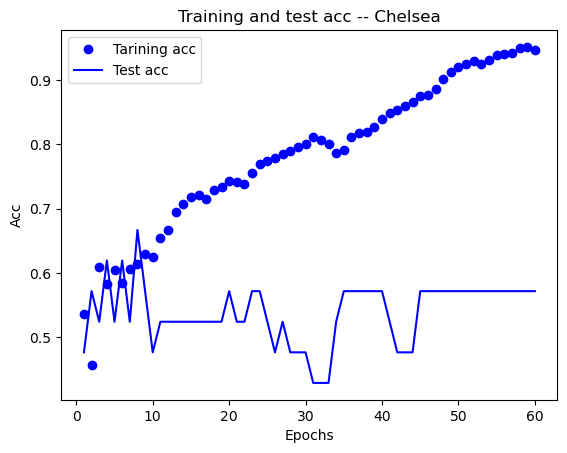

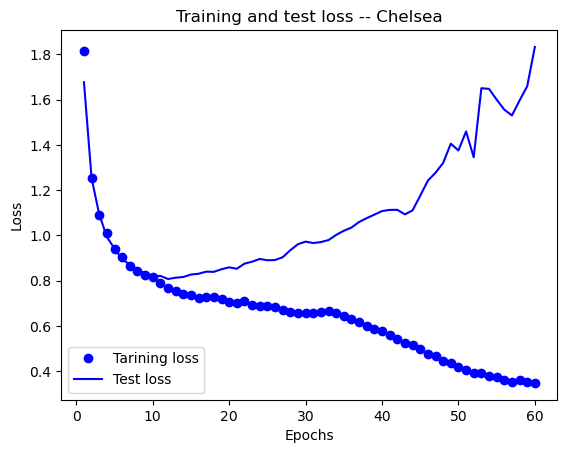

Everton


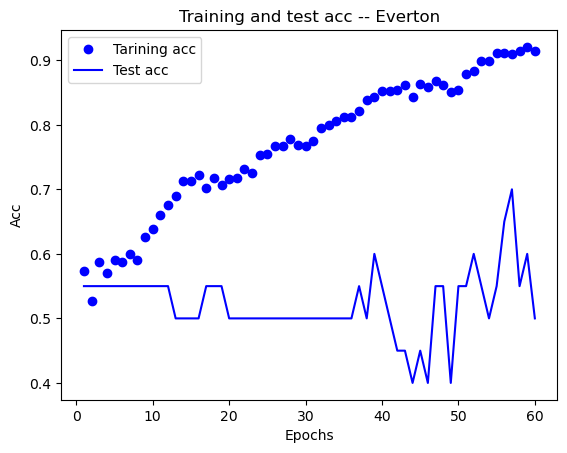

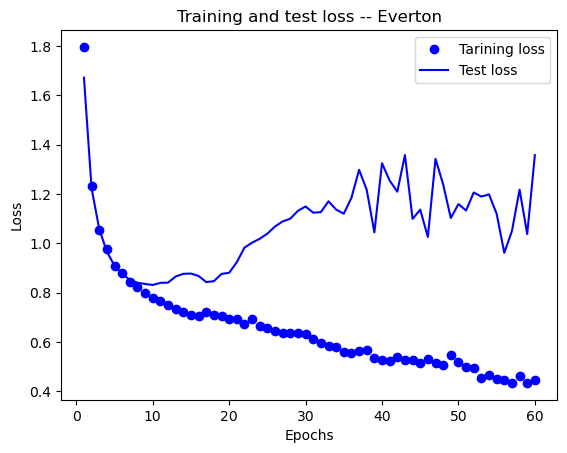

Fulham


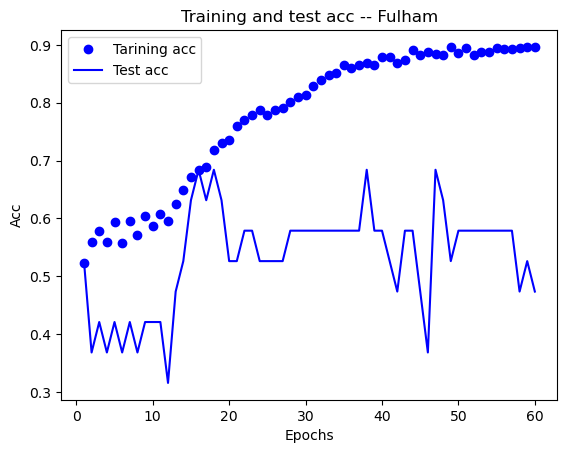

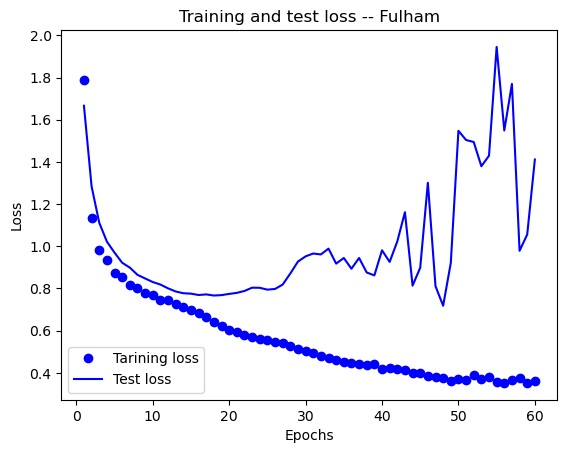

Liverpool


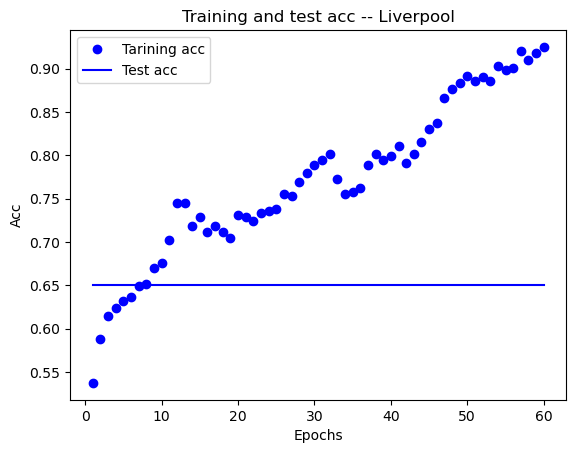

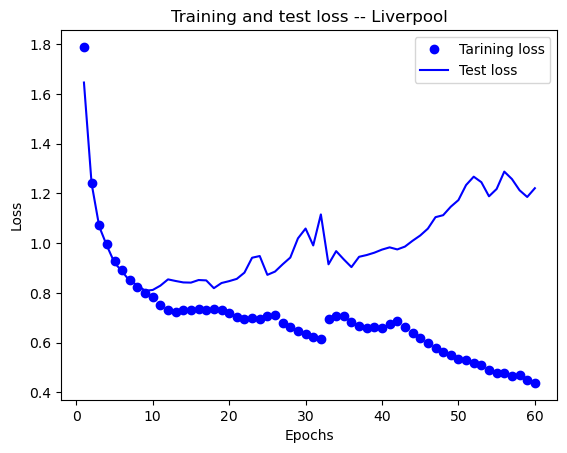

Man City


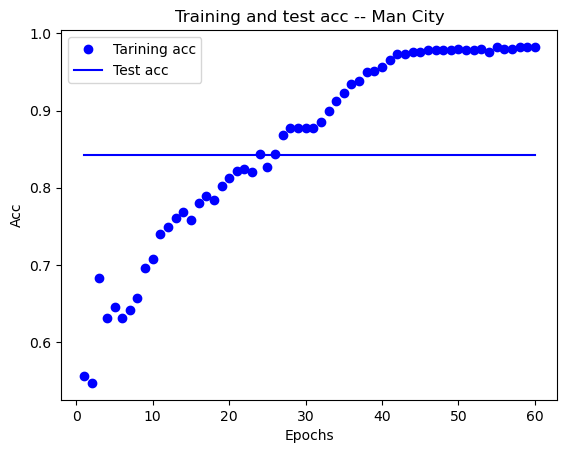

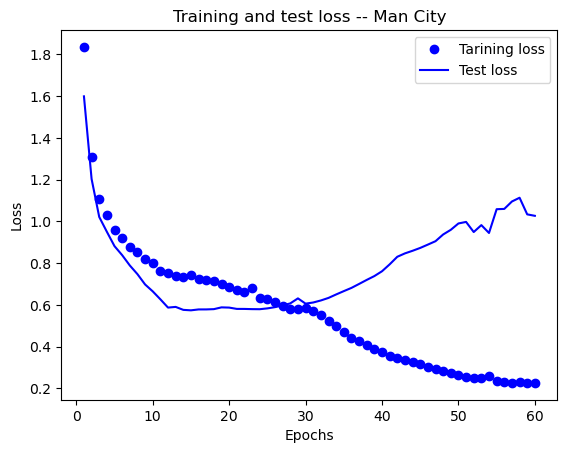

Man United


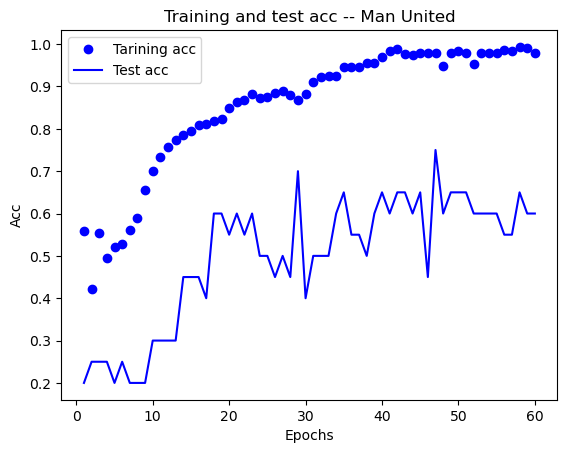

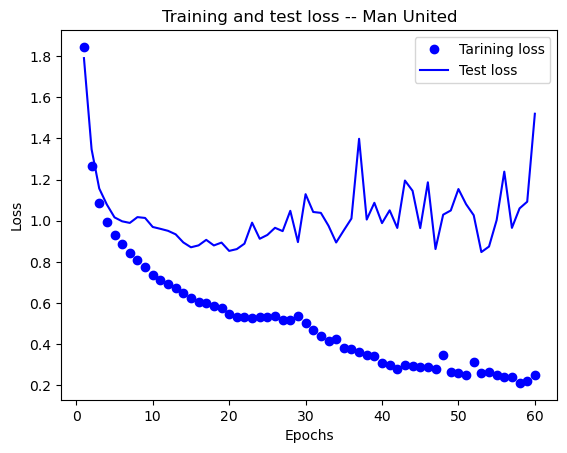

Newcastle


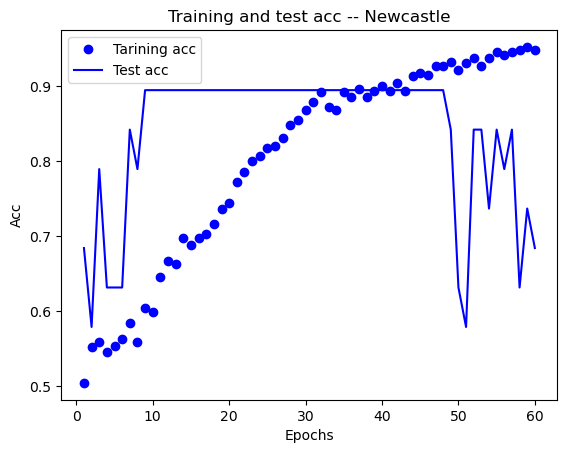

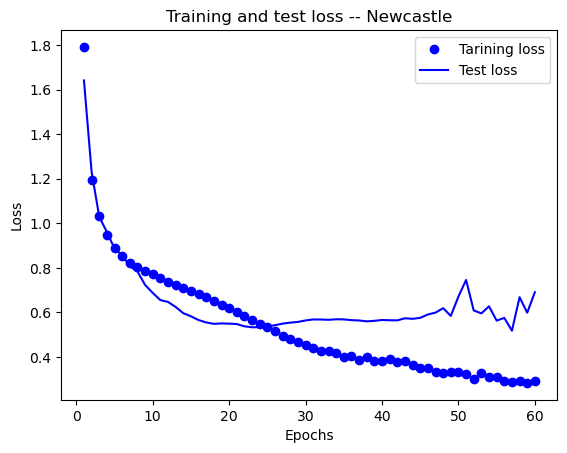

Tottenham


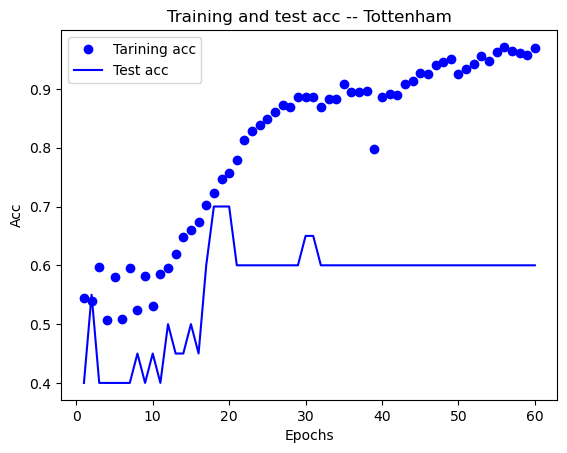

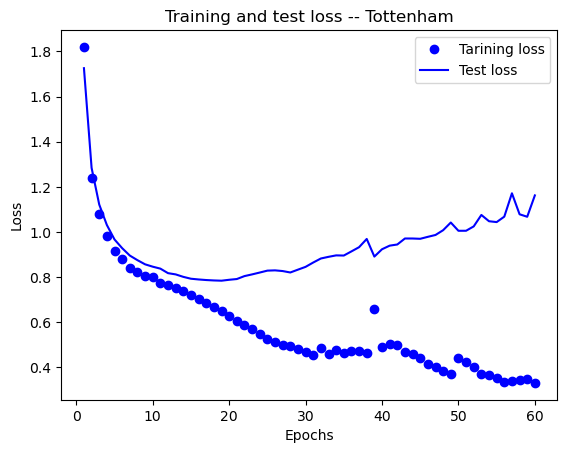

West Ham


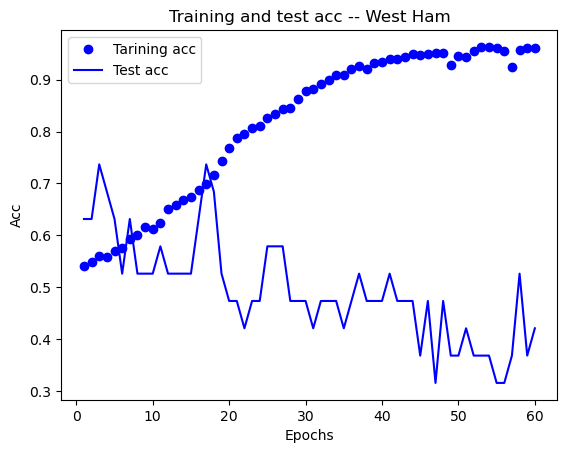

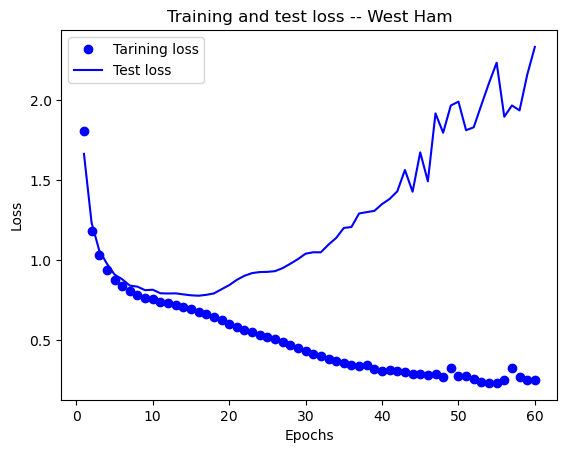

Wolves


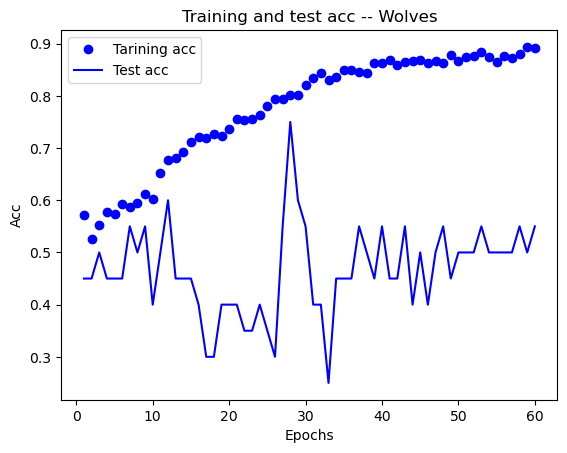

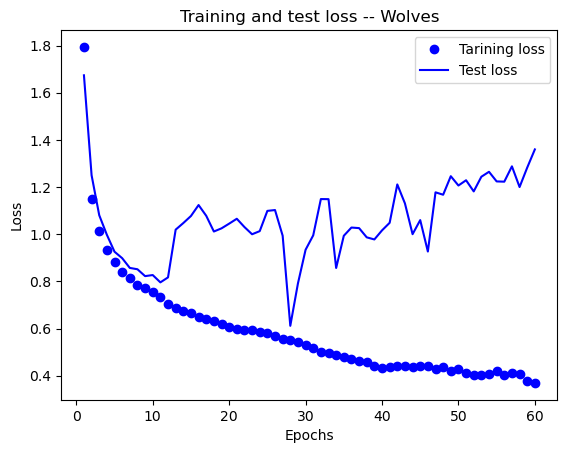

Southampton


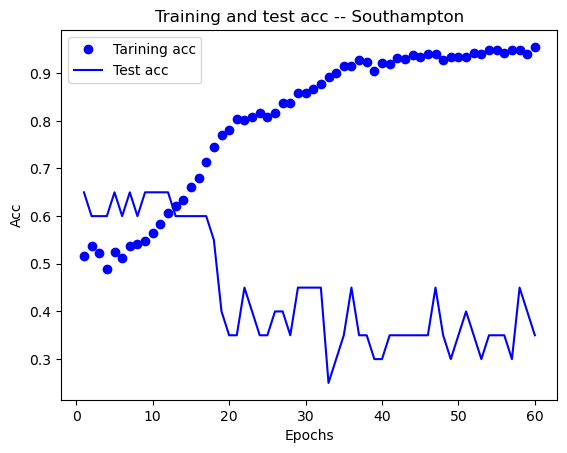

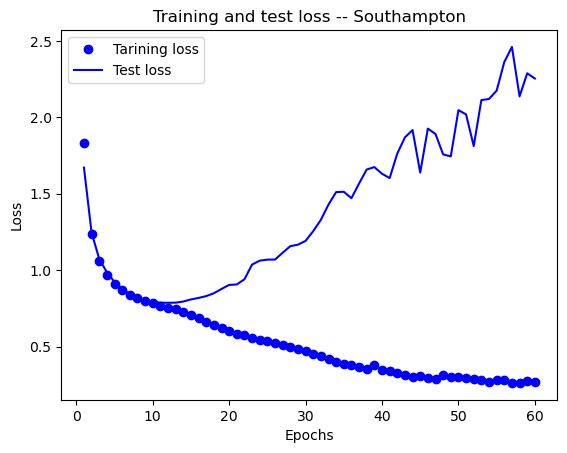

Crystal Palace


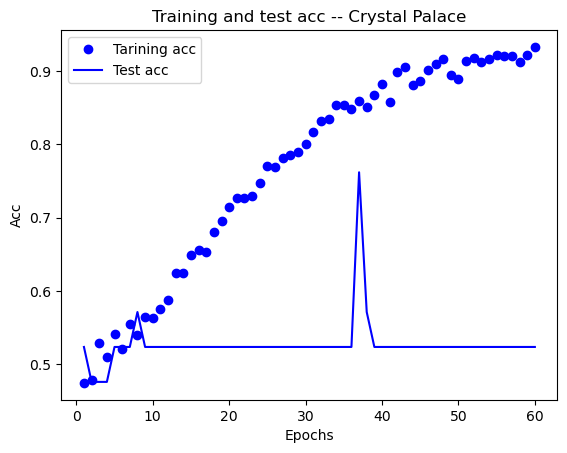

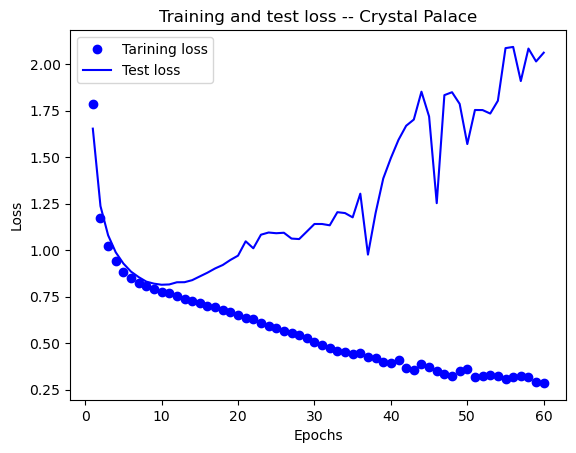

Leicester


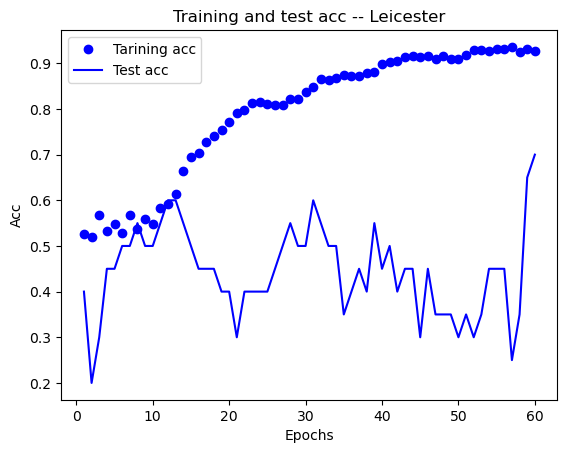

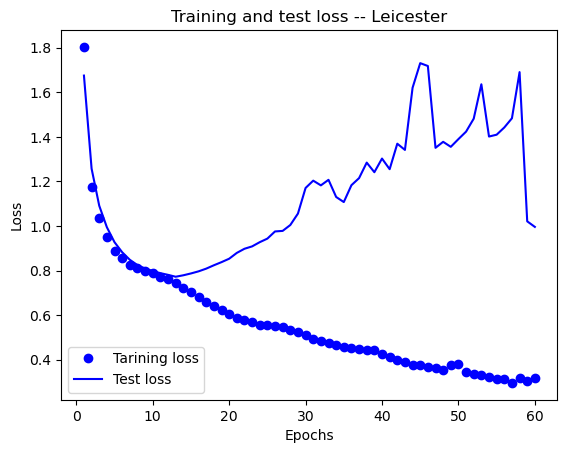

Bournemouth


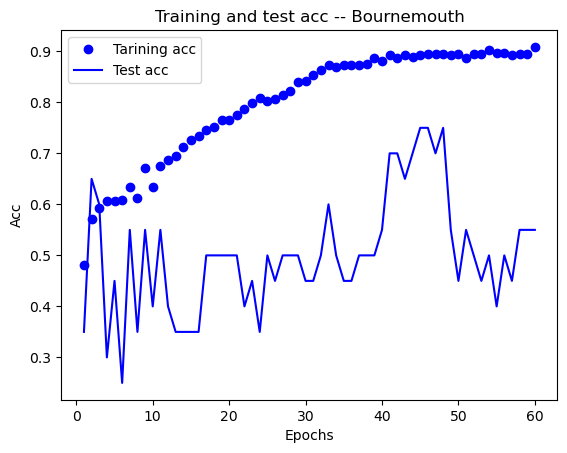

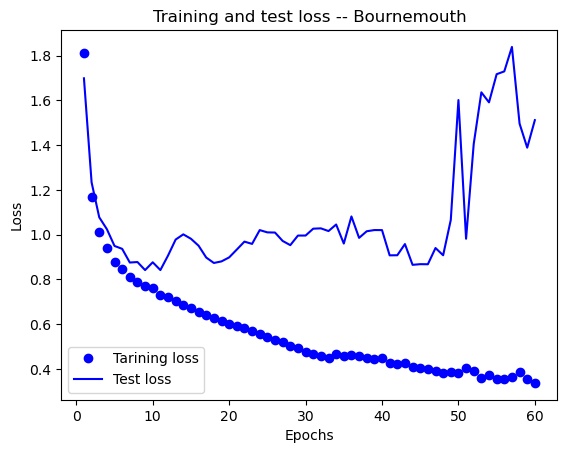

Brighton


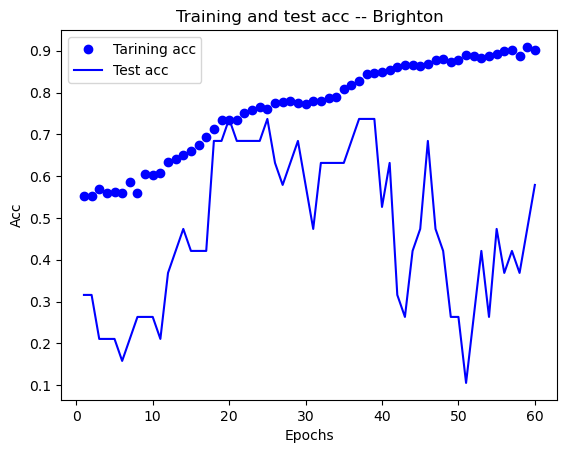

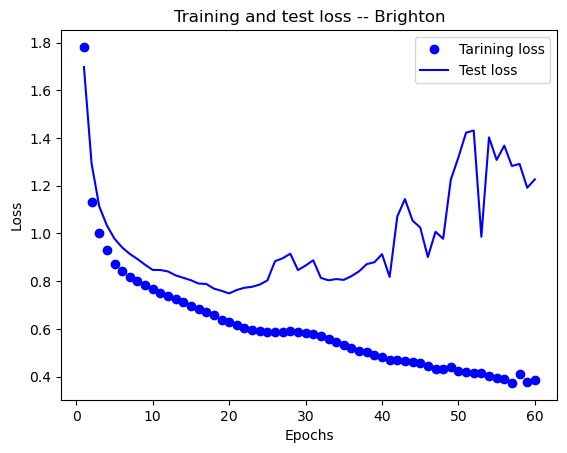

Leeds


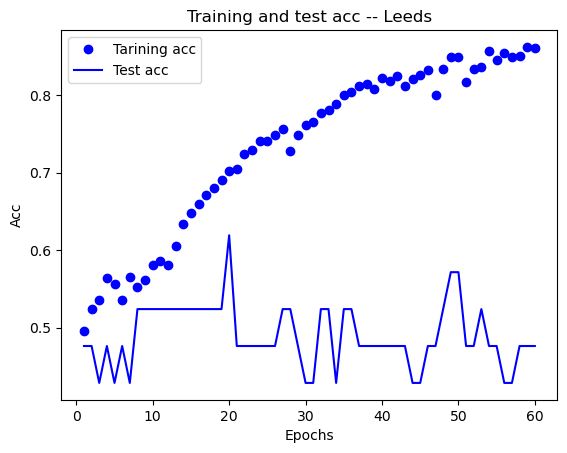

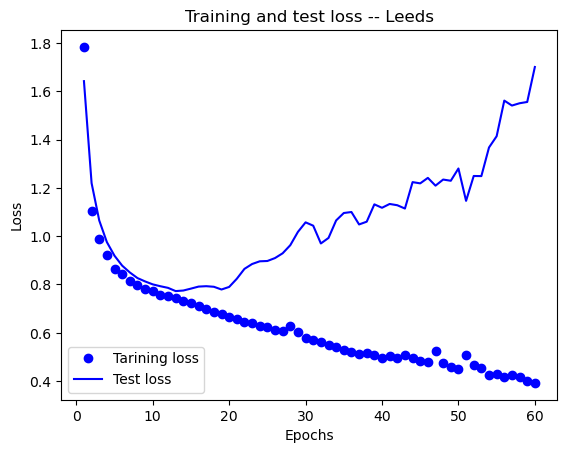

Brentford


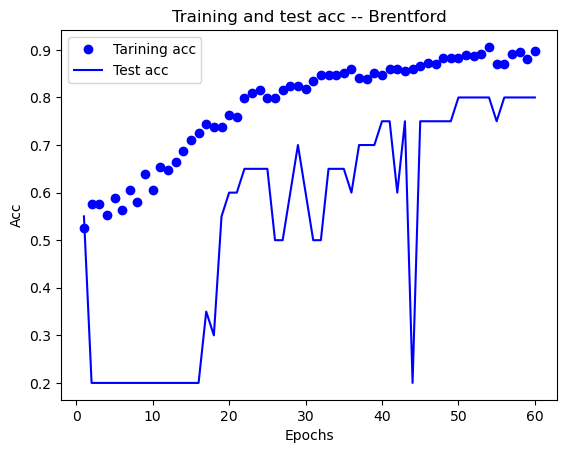

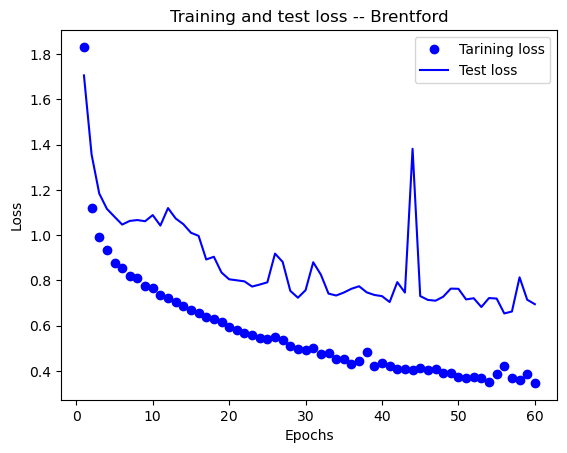

Nott'm Forest


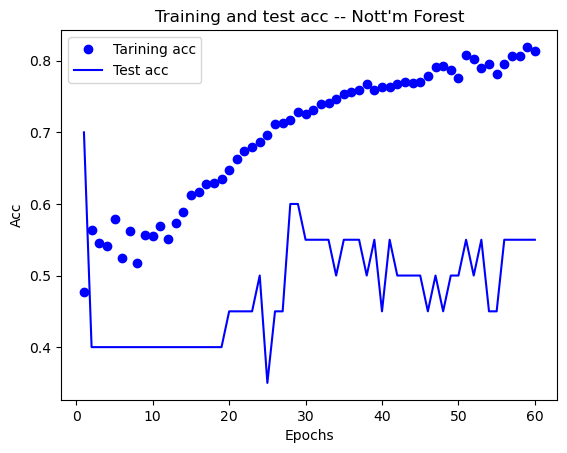

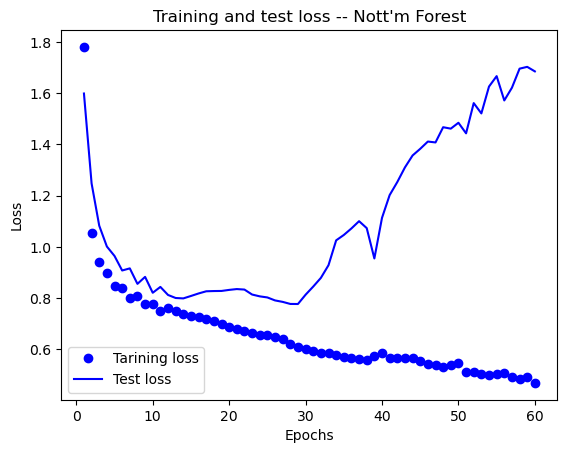

In [6]:
import matplotlib.pyplot as plt

# 如果队伍已存在，则跳过
query = 'select name from Teams'
cur.execute(query,)
dataCount = cur.fetchall()

for v in dataCount:
    
    sql = ""
    results = pd.read_sql('''
        SELECT * FROM Accuracy where team = ? and model = ?
    ''', con, params=(v[0], 'VCNK'))
    
    train_results = results[results['type'] == 'test']
    if len(train_results) == 0:
        continue

    print(v[0])
    epochs = range(1, len(train_results) + 1)

    # acc变化曲线图
    plt.plot(epochs, results[results['type'] == 'train']['acc'], 'bo', label="Tarining acc")
    plt.plot(epochs, results[results['type'] == 'test']['acc'], 'b', label="Test acc")
    plt.title('Training and test acc -- ' + v[0])
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

    plt.show()

    # loss变化曲线图
    plt.plot(epochs, results[results['type'] == 'train']['loss'], 'bo', label="Tarining loss")
    plt.plot(epochs, results[results['type'] == 'test']['loss'], 'b', label="Test loss")
    plt.title('Training and test loss -- ' + v[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    print("===================================================================================================")
